<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/Digital_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/bijouvj/ST-summer-2024.git

Cloning into 'ST-summer-2024'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 1.60 MiB | 4.42 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
!ls

sample_data  ST-summer-2024


# Difference between Analog & Digital

Imagine you have a record player and a CD player. Both play music, but they work in fundamentally different ways. That difference is all about analog vs. digital.

**Analog:**

* Think of an old record player with a vinyl record. The grooves on the record represent the ups and downs of sound waves. A needle reads these grooves, and those movements are converted into electrical signals that your speakers can turn back into sound.
* It's like a physical picture of the sound wave. Imagine drawing a squiggly line on a piece of paper to represent how the sound wave moves back and forth. An analog signal is similar, but with physical variations representing the sound.
* Analog signals are continuous, meaning they change smoothly over time, just like the grooves on a record.

**Digital:**

* Now think of a CD player. CDs store music as a series of ones and zeros, like a computer code. This code represents the sound wave by breaking it down into tiny pieces, kind of like taking a bunch of snapshots of that squiggly line on paper.
* It's like a bunch of dots that together create the picture of the sound wave. The more dots you have, the clearer the picture.
* Digital signals are discrete, meaning they only have specific values (ones and zeros) at specific points in time.


# Analog to Digital Conversion of Audio

Converting analog audio (like speech) to a digital format like MP3 involves several steps:

**1. Analog to Digital Conversion (ADC):**

* The first step is to convert the continuous analog audio signal (variations in voltage representing sound waves) into a digital format that computers can understand.
* This is done using an **analog-to-digital converter (ADC)**.
* The ADC samples the analog signal at a specific rate (measured in samples per second or Hz). The higher the sampling rate, the more accurately the digital representation captures the original sound.
* During sampling, the ADC assigns a digital value (usually a binary number) to the amplitude (strength) of the analog signal at each sample point.

**2. Quantization:**

* The continuous range of analog signal amplitudes is converted into discrete values during sampling. This process is called **quantization**.
* The number of bits used to represent each sample determines the quantization level. More bits allow for a wider range of values and a more accurate representation of the original signal. However, this also increases the file size.

**3. Encoding:**

* Once the audio is in digital format (a series of numbers representing sampled amplitudes), it needs to be encoded for storage or transmission.
* Audio codecs like MP3 come into play here. These codecs use algorithms to compress the digital audio data while preserving as much quality as possible.
* MP3 uses a technique called **psychoacoustic modeling** to remove sounds that are less audible to the human ear. This allows for significant file size reduction compared to uncompressed audio formats like WAV or PCM.

**4. Additional Processing (Optional):**

* Depending on the desired outcome, additional processing steps like applying filters or adjusting bitrate (data transfer rate) might be used.

**5. Saving the File:**

* The final compressed audio data is then saved in a specific file format, such as MP3 (.mp3), which allows for playback on compatible devices and software.

**Here's a quick summary:**

1. Analog audio ->
2. Sampling (ADC) -> Digital representation (series of numbers) ->
3. Quantization (assigning discrete values) ->
4. Encoding (compression with MP3 or other codec) ->
5. Saving as a digital file (.mp3)

By following these steps, analog audio like speech is transformed into a digital format suitable for storage, transmission, and playback on various digital devices. The specific details of the process, such as sampling rate, bitrate, and chosen codec, can impact the resulting audio quality and file size.


Watch the following video:

https://www.youtube.com/watch?v=spUNpyF58BY&pp=ygUTM2JsdWUxYnJvd24gZm91cmllcg%3D%3D

In [ ]:
# Python package for working with audio files
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sig, rate = librosa.load("ST-summer-2024/sample-12s.mp3", sr=44100, mono=True)

In [ ]:
type(sig)

numpy.ndarray

In [ ]:
sig.size

563712

In [ ]:
sig.nbytes

2254848

In [ ]:
# compute the Fourier transform
fft = np.fft.fft(sig)

In [ ]:
type(fft)

numpy.ndarray

In [ ]:
fft.shape

(563712,)

In [ ]:
magnitude = np.abs(fft)
magnitude

array([10114.52104515,    29.58840293,    20.74865888, ...,
          33.60572954,    20.74865888,    29.58840293])

In [ ]:
frequency = np.linspace(0, rate, len(magnitude))
frequency

array([0.00000000e+00, 7.82315761e-02, 1.56463152e-01, ...,
       4.40998435e+04, 4.40999218e+04, 4.41000000e+04])

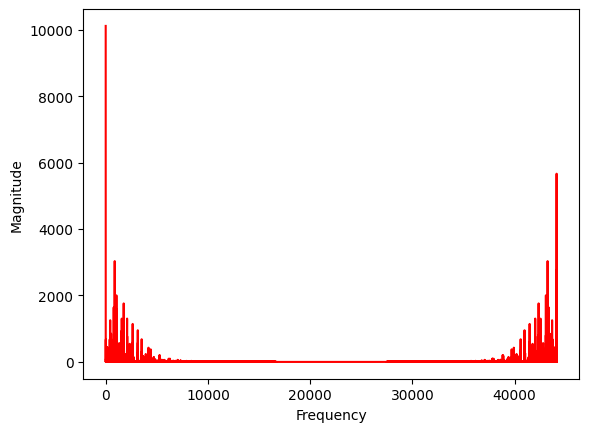

In [ ]:
plt.plot(frequency, magnitude, 'r')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# Question

What are some of the file types in which audio data is stored? We've seen mp3, which is very commmon. Find out 2-3 more.

In [ ]:
# we will install a package to help with conversion of files
!pip3 install pydub

In [ ]:
from pydub import AudioSegment

In [ ]:
sound = AudioSegment.from_mp3("ST-summer-2024/sample-12s.mp3")
sound.export("/content/sample-12s.wav", format="wav")

<_io.BufferedRandom name='/content/sample-12s.wav'>

In [ ]:
!ls -l /content/sample-12s.wav

-rw-r--r-- 1 root root 2254892 Jun 21 04:05 /content/sample-12s.wav


In [ ]:
!ls -l ST-summer-2024/sample-12s.mp3

-rw-r--r-- 1 root root 205470 Jun 21 04:01 ST-summer-2024/sample-12s.mp3


# Question

What do you notice about the size of the files? Why is that? Research about the mp3 and wav format, and how they are different.

# Mel Spectrogram

Next up, we will look into something called the Mel Spectrogram.

A mel spectrogram is a visual representation of an audio signal that takes into account how humans perceive sound. It's a powerful tool used in various audio analysis applications, like speech recognition, music information retrieval, and speaker identification.

Here's a breakdown of the key aspects of a mel spectrogram:

**1. Spectrogram Basics:**

* A regular spectrogram displays the frequency content of an audio signal over time. It essentially breaks down the sound into its component frequencies and shows how the intensity (strength) of each frequency changes over time. This creates a visual representation where the x-axis represents time, the y-axis represents frequency (in Hertz, Hz), and color intensity indicates the strength of that frequency at a specific time.

**2. Mel Scale:**

* Human ears don't perceive sound equally across the entire frequency spectrum. We are more sensitive to changes in lower frequencies compared to higher frequencies. The mel scale is a perceptual scale that approximates this non-linear human perception of pitch. It essentially compresses the high-frequency range and expands the low-frequency range on a linear scale.

**3. Mel Filter Banks:**

* To create a mel spectrogram, the audio signal is passed through a series of mel filter banks. These filters mimic the human auditory system's frequency response. Each filter captures a specific range of frequencies on the mel scale.

**4. Mel Spectrogram Visualization:**

* The output of the mel filter banks is then displayed as a mel spectrogram. The x-axis still represents time, but the y-axis now represents frequency on the mel scale. The color intensity at each point in the spectrogram indicates the strength of the signal within that specific frequency band based on the mel scale.

**Benefits of Mel Spectrograms:**

* **Human-centric representation:** Mel spectrograms provide a more intuitive way to analyze audio information as they consider human auditory perception.
* **Focus on relevant frequencies:** By focusing on frequencies that humans perceive better, mel spectrograms can be more effective for tasks like speech recognition.
* **Reduced dimensionality:** Mel spectrograms reduce the complexity of the original audio signal by focusing on perceptually relevant information, making it easier for machine learning algorithms to process audio data.

**Applications of Mel Spectrograms:**

* **Speech Recognition:** Mel spectrograms are widely used in speech recognition systems to help machines understand spoken language. Analyzing the time-frequency patterns in the spectrogram allows the system to identify phonemes (basic units of speech) and ultimately recognize words and sentences.
* **Music Information Retrieval:** Mel spectrograms can be used to identify songs, classify music genres, and analyze musical content. By comparing the mel spectrograms of different audio recordings, similarities and differences in their frequency content can be identified.
* **Speaker Identification:** Mel spectrograms can be used to identify speakers based on their unique vocal characteristics reflected in the spectrogram patterns.


In [ ]:
S = librosa.feature.melspectrogram(y=sig, sr=rate, power=2.0, n_mels=512)

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [ ]:
# convert the amplitute to decibels
logS = librosa.amplitude_to_db(abs(S))

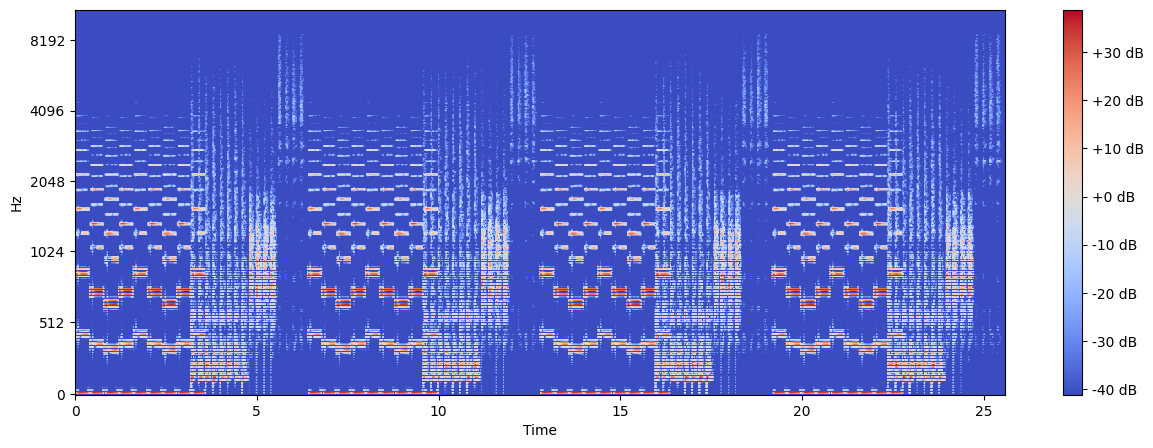

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [ ]:
from IPython.display import Audio

In [ ]:
# now let's listen to the audio
Audio("ST-summer-2024/sample-12s.mp3")

# CQT Analysis

CQT, which stands for Constant-Q Transform, is another technique used for audio signal analysis. Similar to mel spectrograms, it provides a visual representation of the frequency content of an audio signal over time. However, CQT takes a different approach compared to spectrograms and mel spectrograms.

Here's a breakdown of CQT analysis:

**1. Underlying Principle:**

* A spectrogram uses a fixed window size for analysis across all frequencies. This can be less suitable for capturing the behavior of both high and low frequencies effectively.
* CQT overcomes this limitation by using a **constant-Q bandwidth**. This means the frequency resolution changes based on the center frequency of the analysis window. It uses narrower windows for higher frequencies (where rapid changes occur) and wider windows for lower frequencies (where changes are more gradual).

**2. Implementation:**

* CQT employs a series of overlapping filters with varying bandwidths. These filters are designed to capture a constant range on the mel scale (similar to mel spectrograms) or another psychoacoustic scale.
* The audio signal is passed through these filters, and the output represents the signal's strength within each frequency band at a specific point in time.

**3. CQT Spectrogram Visualization:**

* The resulting data is displayed as a CQT spectrogram. Similar to a mel spectrogram, the x-axis represents time, and the y-axis represents frequency. However, unlike a regular spectrogram where the frequency bins are of equal width, the frequency bins in a CQT spectrogram have varying widths based on the constant-Q principle. Color intensity again indicates the strength of the signal within each time-frequency bin.

**Advantages of CQT Analysis:**

* **Improved resolution:** CQT provides better resolution for both high and low frequencies compared to traditional spectrograms. This can be beneficial for tasks where capturing rapid changes in high frequencies and subtle variations in low frequencies is crucial.
* **Reduced artifacts:** CQT can minimize artifacts like spectral leakage that can occur in traditional spectrograms due to the use of fixed window sizes.

**Applications of CQT Analysis:**

* **Music analysis:** CQT is useful for analyzing the musical content of audio signals, such as identifying musical notes, chords, and harmonic progressions. The improved resolution at both high and low frequencies can be advantageous for capturing the complex frequency interactions in music.
* **Sound event detection:** CQT can be used to identify specific sound events within an audio recording. The time-frequency patterns in the CQT spectrogram can be informative for classifying different types of sounds.
* **Audio segmentation:** CQT can be used to segment audio signals into meaningful parts based on the changes in the frequency content over time. This can be helpful for tasks like separating speech from background noise or identifying transitions between different sections in a musical piece.

In [ ]:
C = librosa.cqt(sig, sr=rate, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))

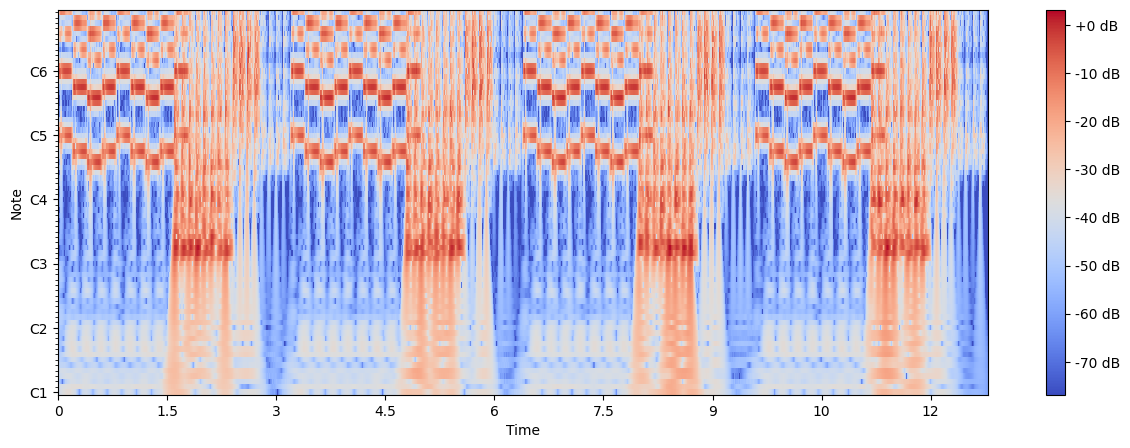

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=rate, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')